1. Pridic the Index price 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_index = pd.read_csv('economic_index.csv')

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
# Drop unnecessary Column year , month , unnamed

df_index.drop(['year','month','Unnamed: 0'], axis=1, inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
# Check null values are there or not
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

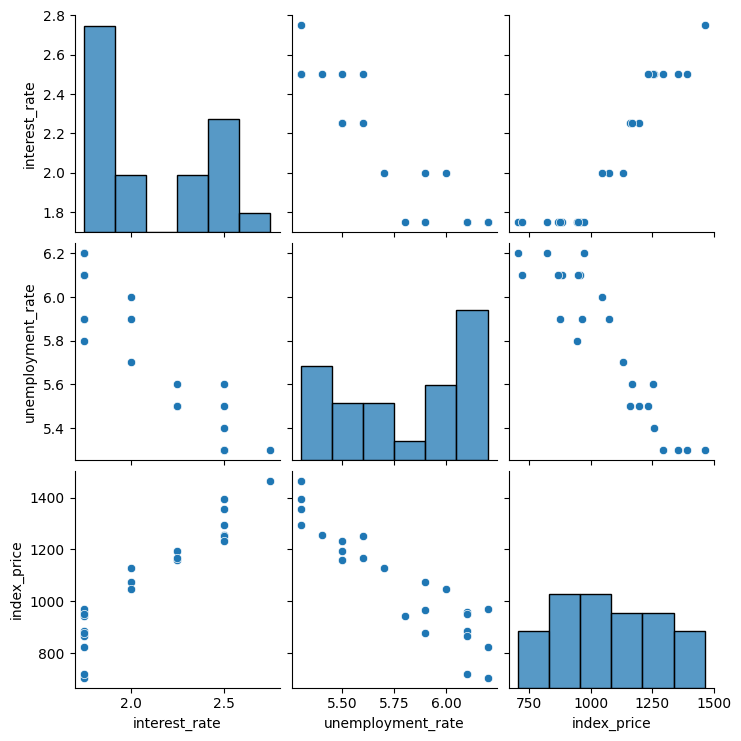

In [7]:
## Lets do some Visulization
import seaborn as sns
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


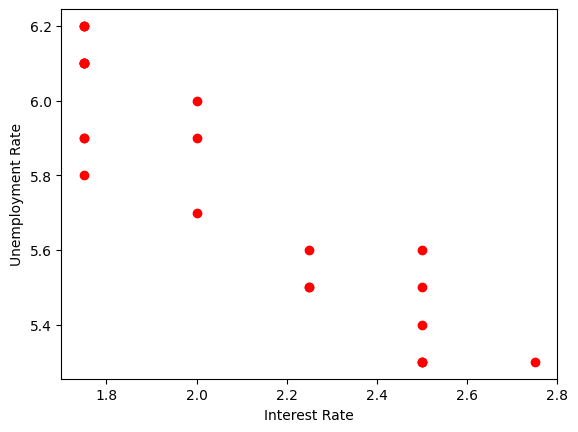

In [9]:
## Visulization data points more deeply 
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'] , color = 'r')
plt.xlabel('Interest Rate')

plt.ylabel('Unemployment Rate')

plt.show()

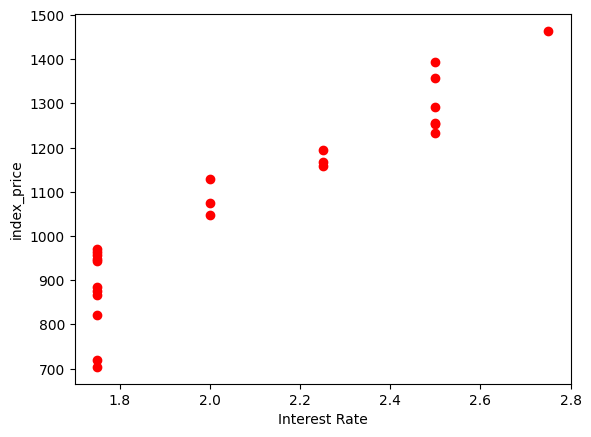

In [10]:
plt.scatter(df_index['interest_rate'], df_index['index_price'] , color = 'r')
plt.xlabel('Interest Rate')

plt.ylabel('index_price')

plt.show()

In [11]:
# Independent and dependent features
X = df_index.iloc[:,:-1] # Take all values except for last
y = df_index.iloc[:,-1] # take only last value

In [12]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [14]:
## Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

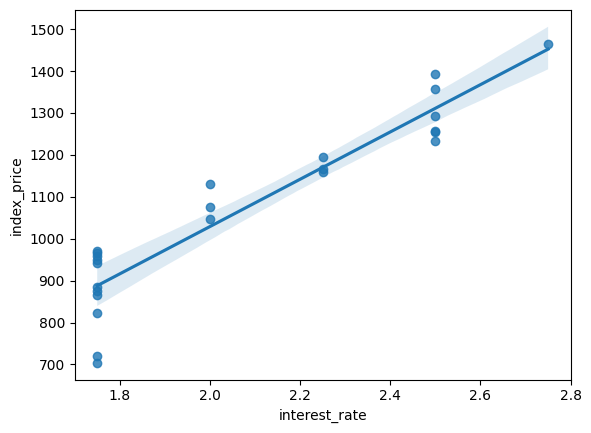

In [16]:
# this plot data in linear fit
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

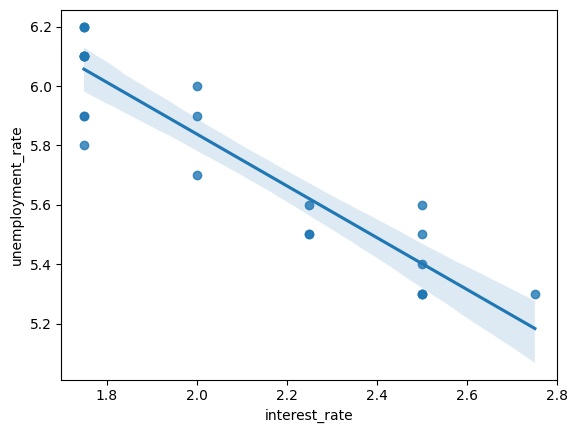

In [17]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

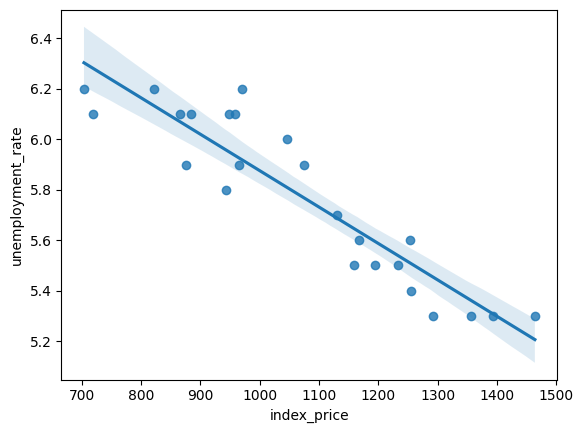

In [18]:
sns.regplot(x=df_index['index_price'], y=df_index['unemployment_rate'])

In [19]:
# Stander scalling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
## Cross validation 

from sklearn.model_selection import cross_val_score
# estimator --> model , X ,y , scorring -> 
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, scoring='neg_mean_squared_error' , cv = 3)

accuracies

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [23]:
np.mean(accuracies)

np.float64(-5914.828180162386)

In [24]:
accuracies.mean()

np.float64(-5914.828180162386)

In [25]:
# predictions 
y_pred = regressor.predict(X_test)

In [26]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [28]:
# performance matrix 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

r2_score = r2_score(y_test, y_pred)

rmse = np.sqrt(mse)
# adj - r2 score

n = len(X_test)

p = X_test.shape[1]

adj_r2 = 1 - (1 - r2_score) * (n - 1) / (n - p - 1) 
print(f"The mean absolute error is {mae}")

print(f"The mean squared error is {mse}")

print(f"The R-squared score is {r2_score}")

print(f"The root mean squared error is {rmse}")

print(f"The adjusted R-squared score is {adj_r2}")

The mean absolute error is 59.935781523235484
The mean squared error is 5793.762887712569
The R-squared score is 0.8278978091457145
The root mean squared error is 76.11677139574805
The adjusted R-squared score is 0.7131630152428576


## Assimptions

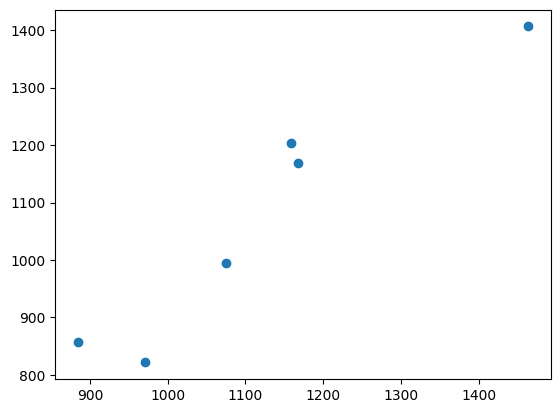

In [29]:
plt.scatter(y_test,y_pred)

In [30]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


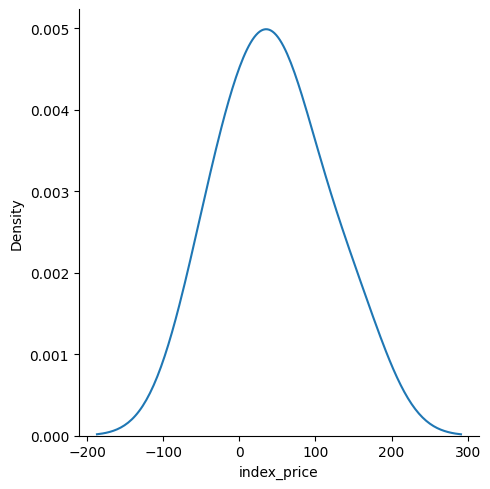

In [31]:
## Plot this Residules

sns.displot(residuals,kind = 'kde')

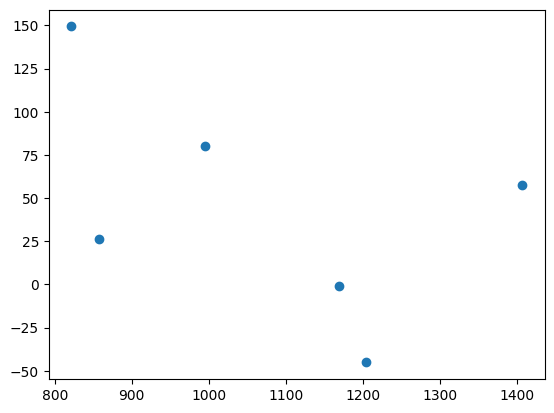

In [32]:
# Scatter plot with respect to predictions and residules 
plt.scatter(y_pred , residuals)

In [33]:
## OLS linear regression 

import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

In [35]:
model.summary()

c:\Users\omkar\anaconda3\envs\ml_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 14 Feb 2025   Prob (F-statistic):                       0.754
Time:                        10:54:38   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print(regressor.coef_)

[  88.27275507 -116.25716066]
